In [ ]:
import io
import pandas as pd
from PIL import Image,ImageDraw, ImageFont
import face_recognition
import numpy as np
from tqdm import tqdm
from statistics import mode
import time
from os import listdir
from os.path import isfile, join

In [ ]:
def display_IMG(imgsource):
    a=Image.open(imgsource)
    a.show()

In [ ]:
def drawVertices(image_source):
    with io.open(image_source, 'rb') as image_file:
        content = image_file.read() #Content has type byte
    pillow_img = Image.open(io.BytesIO(content))
    draw = ImageDraw.Draw(pillow_img)
    font = ImageFont.truetype('/Library/Fonts/Arial.ttf', 30) #Maybe different on non-Mac
    
    image=face_recognition.load_image_file(image_source)
    locations=face_recognition.face_locations(image)
    for i in locations: #top, left, bottom, right
        top, left, bottom, right=i
        p1=(top,right)
        p2=(top,left)
        p3=(bottom,left)
        p4=(bottom,right)
        for vertices in ((p1,p2),(p2,p3),(p3,p4),(p4,p1)):
            draw.line(((vertices[0][1], vertices[0][0]), (vertices[1][1], vertices[1][0])),
                        fill='green',
                        width=8
                )
#         draw.text((vertices[0].x + 10, vertices[0].y),
#               font=font, text=text_list[index], 
#               fill=(255, 255, 255))
    return pillow_img

In [ ]:
#This function return the RBG array
def createListImgArray(jpg_list):
    array_list=[]
    for image_dir in tqdm(jpg_list):
        image=face_recognition.load_image_file(image_dir)
        face_locations = face_recognition.face_locations(image)

        for face_location in face_locations:

            top, right, bottom, left = face_location
            face_image = image[top:bottom, left:right]
            array_list.append(face_image)
    return np.array(array_list)

# Import train/test

In [10]:
#Train
folder_dir="train_v1"
jpg_train_list = [folder_dir+'/'+f for f in listdir(folder_dir) if (f.split(".")[1] in ["jpg","jpeg"])]
train_img=createListImgArray(jpg_train_list)

100%|██████████| 9/9 [00:03<00:00,  3.36it/s]


In [11]:
#Label. 
#If do not know or do not care, enter 0
labels=[]
for i in range(len(train_img)):
    image=Image.fromarray(train_img[i])
    image.show()
    val = input("{} Who is this(Initials): ".format(i)) 
    labels.append(val)


0 Who is this(Initials): TT
1 Who is this(Initials): TTB
2 Who is this(Initials): HW
3 Who is this(Initials): HW
4 Who is this(Initials): TTB
5 Who is this(Initials): TT
6 Who is this(Initials): TT
7 Who is this(Initials): TTB
8 Who is this(Initials): TT
9 Who is this(Initials): TT
10 Who is this(Initials): HW
11 Who is this(Initials): TT


In [46]:
#Test
folder_dir="test_v1"
jpg_test_list = [folder_dir+'/'+f for f in listdir(folder_dir) if (f.split(".")[1] in ["jpg","jpeg"])]
test_img=createListImgArray(jpg_test_list)

100%|██████████| 6/6 [00:01<00:00,  3.67it/s]


In [47]:
#Embedding to a 1D vector
train_clean=np.array([face_recognition.face_encodings(i)[0] for i in train_img])
test_clean=np.array([face_recognition.face_encodings(i)[0] for i in test_img])

In [48]:
train_clean[0]

array([-0.14011672,  0.05298756,  0.08364242, -0.02494364, -0.11147099,
       -0.03258045, -0.10963631, -0.10734752,  0.09788394, -0.13811854,
        0.15200348, -0.05047815, -0.19933251, -0.06713971,  0.01031205,
        0.15550795, -0.13686389, -0.17045683, -0.01326153,  0.02384602,
        0.1009816 ,  0.01153877,  0.03633279,  0.0353216 , -0.15054806,
       -0.31188932, -0.10477401, -0.07136108, -0.02246147, -0.04264772,
       -0.11653801,  0.01834015, -0.1845201 , -0.00969277,  0.0204502 ,
        0.09884808,  0.01169335, -0.01585351,  0.18219972,  0.03659082,
       -0.25619751,  0.01221883, -0.00367445,  0.22533624,  0.1657964 ,
        0.0596808 ,  0.00628618, -0.11580293,  0.10714531, -0.17635478,
        0.04516238,  0.20214707,  0.07410692,  0.05794928, -0.05318747,
       -0.10375133,  0.04405656,  0.04699229, -0.11020054,  0.05874955,
        0.09982309, -0.10427324, -0.07863401, -0.10390541,  0.26576909,
        0.0704724 , -0.14778551, -0.19882818,  0.09351037, -0.12

### Traditional Machine Learning

In [49]:
#Create the train data frame
df_clean=pd.DataFrame({})
for i in range(len(train_clean[0])):
    df_clean['p'+str(i)]=train_clean[:,i]
df_clean['labels']=labels
df_clean.head()

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p119,p120,p121,p122,p123,p124,p125,p126,p127,labels
0,-0.140117,0.052988,0.083642,-0.024944,-0.111471,-0.032580,-0.109636,-0.107348,0.097884,-0.138119,...,0.102156,-0.016156,0.073597,-0.206192,-0.043118,0.116921,-0.042106,0.049720,0.040049,TT
1,-0.111981,0.091927,0.116295,-0.009222,-0.073756,0.027458,-0.010509,-0.073651,0.158237,-0.144431,...,0.090781,0.061036,-0.049957,-0.290129,-0.002929,0.100788,0.030079,0.032895,0.024566,TTB
2,-0.105103,0.031427,0.052956,-0.071866,-0.100171,0.021823,-0.049201,-0.048006,0.184224,-0.192372,...,0.078232,-0.026994,0.030171,-0.226149,0.002743,0.109810,-0.050459,0.092491,-0.026383,HW
3,-0.079459,0.104681,0.036328,-0.108435,-0.119209,-0.000644,-0.079736,-0.117312,0.178081,-0.155206,...,0.093729,-0.022146,-0.034560,-0.250002,-0.001865,0.096188,-0.028598,0.095165,-0.002170,HW
4,-0.111215,0.105983,0.056718,-0.022127,-0.072504,-0.029562,-0.074751,-0.123432,0.142141,-0.118232,...,0.066456,0.053479,-0.051758,-0.244833,-0.033363,0.097838,-0.011814,0.000055,-0.007527,TTB


In [50]:
#Create the test data frame
test=pd.DataFrame({})
for i in range(len(test_clean[0])):
    test['p'+str(i)]=test_clean[:,i]

In [51]:
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

X = df_clean.drop('labels',axis=1)
y=df_clean['labels']

xgb = XGBClassifier()
scores = cross_val_score(xgb, X, y, cv=3)
xgb.fit(X,y)
xgb.predict(test)

array(['TT', 'TT', 'TT', 'TT', 'TT', 'HW', 'TTB', 'TT', 'TT', 'HW', 'TT',
       'TTB', 'TT'], dtype=object)

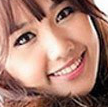

In [52]:
Image.fromarray(test_img[9])

### face_recognition_approach

In [81]:
pic_no=11
results = face_recognition.compare_faces(train_clean, test_clean[pic_no],tolerance=0.3)

Who is that?


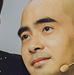

In [82]:
correct_index=[index for index, i in enumerate(results) if i==True]
try:
    print(mode([labels[i] for i in correct_index]))
except:
    print("Who is that?")
Image.fromarray(test_img[pic_no])

# References

https://pythonhosted.org/face_recognition/face_recognition.html#face_recognition.api.compare_faces

https://github.com/ageitgey/face_recognition/blob/master/examples/face_recognition_svm.py